# LendingClub Loan Prediction - Preprocessing & Feature Engineering
## Author: Congjun Huang

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import palettable
import warnings
warnings.filterwarnings('ignore')

from category_encoders import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
loan_df = pd.read_csv('lending_club_loan_two.csv')
loan_df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [3]:
print(loan_df.shape)
print(loan_df.columns)

(396030, 27)
Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Step 1: Deal with imbalanced data

In [21]:
# current situation
# no missing or errorneous values for dependent variable (loan_status)
print(loan_df['loan_status'].value_counts(dropna=False))

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64


In [26]:
# undersample data points
loan_df_fp = loan_df[loan_df['loan_status']=='Fully Paid']
loan_df_co = loan_df[loan_df['loan_status']=='Charged Off']
count_fp, count_co = loan_df['loan_status'].value_counts()
loan_df_fp_under = loan_df_fp.sample(count_co)
loan_df_under = pd.concat([loan_df_fp_under, loan_df_co], axis=0)

In [30]:
loan_df_1 = loan_df_under

### Step 2: Prescreen eligible columns

#### 2.1 Remove columns

In [31]:
# the original columns
print(loan_df_1.columns)
print(len(loan_df_1.columns))
print(loan_df_1.nunique())

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')
27
loan_amnt                 1353
term                         2
int_rate                   551
installment              38544
grade                        7
sub_grade                   35
emp_title                76506
emp_length                  11
home_ownership               5
annual_inc               13215
verification_status          3
issue_d                    114
loan_status                  2
purpose                     14
title                    20292
dti                       4137
earliest_cr_line           650
open_acc                   

In [32]:
# considering data sparsity problem and the huge amount of work load after one-hot encoding, 
# the columns to be dropped are 'emp_titile', 'title' and 'address'.
col_drop = ['emp_title', 'title', 'address']
loan_df_1_copy = loan_df_1.copy()
for col in col_drop:
    loan_df_2_1 = loan_df_1_copy.drop(col, axis=1)
    loan_df_1_copy = loan_df_2_1

In [33]:
print(loan_df_2_1.columns)
print(len(loan_df_2_1.columns))

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')
24


#### 2.2: Check missing values proportion

In [34]:
# compute percentage of missing values for each column
# missing values within acceptable proportion, no need to drop any column
print(loan_df_2_1.isnull().sum()/ loan_df_2_1.shape[0])

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              0.052657
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000734
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.086253
pub_rec_bankruptcies    0.001184
dtype: float64


In [35]:
loan_df_2_2 = loan_df_2_1

In [36]:
loan_df_2 = loan_df_2_2

### Step 3: Recode categorical & numerical features

In [37]:
loan_df_3 = loan_df_2

In [38]:
# term
loan_df_3['term'] = loan_df_2['term'].str[:3].astype('int')

In [39]:
# emp_length
emp_length_encoder = OrdinalEncoder(cols=['emp_length'],
                                  return_df=True,
                                  mapping=[{'col':'emp_length',
                                           'mapping':{'< 1 year':0,'2 years':1,' 3 years':2,'4 years':3,
                                                      '5 years':4,'6 years':5,'7 years':6,'8 years':7,
                                                      '9 years':8,'10+ years':9}}])
loan_df_3 = emp_length_encoder.fit_transform(loan_df_3)

In [40]:
# sub_grade
sub_grade_encoder = OrdinalEncoder(cols=['sub_grade'],
                                  return_df=True,
                                  mapping=[{'col':'sub_grade',
                                           'mapping':{'A1':0,'A2':1,'A3':2,'A4':3,'A5':4,
                                                      'B1':5,'B2':6,'B3':7,'B4':8,'B5':9,
                                                     'C1':10,'C2':11,'C3':12,'C4':13,'C5':14,
                                                     'D1':15,'D2':16,'D3':17,'D4':18,'D5':19,
                                                     'E1':20,'E2':21,'E3':22,'E4':23,'E5':24,
                                                     'F1':25,'F2':26,'F3':27,'F4':28,'F5':29,
                                                     'G1':30,'G2':31,'G3':32,'G4':33,'G5':34}}])
loan_df_3 = sub_grade_encoder.fit_transform(loan_df_3)

In [41]:
# issue_d 
loan_df_3['issue_d'] = pd.to_datetime(loan_df_2['issue_d']) - pd.to_datetime('2000-01-01')
loan_df_3['issue_d'] = loan_df_3['issue_d'].astype('str').str[:-5].astype('int')

In [42]:
# ealiest_cr_line
loan_df_3['earliest_cr_line'] = pd.to_datetime(loan_df_2['earliest_cr_line']) - pd.to_datetime('2000-01-01')
loan_df_3['earliest_cr_line'] = loan_df_3['earliest_cr_line'].astype('str').str[:-5].astype('int')

In [43]:
# loan_status
loan_df_3['loan_status'] = loan_df_2['loan_status'].replace({'Fully Paid':0, 'Charged Off':1})

### Step 4: Feature engineering

In [44]:
loan_df_4 = loan_df_3

In [45]:
# drop grade since already have sub grade
loan_df_4.drop('grade', axis=1, inplace=True)

<AxesSubplot:>

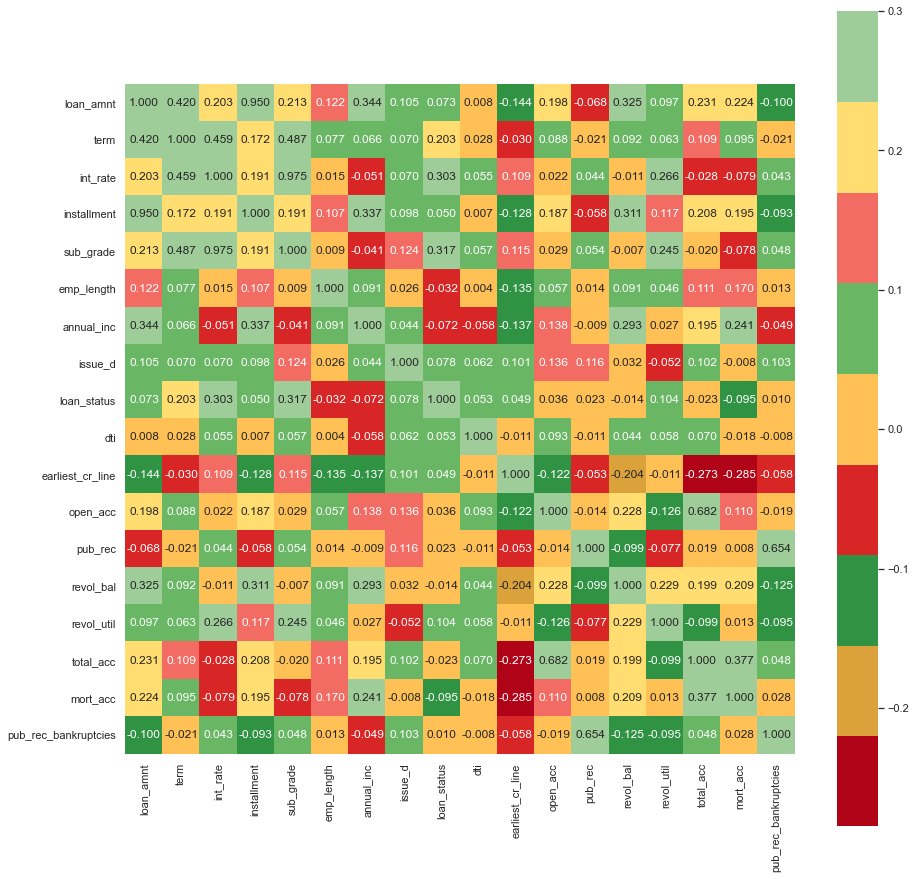

In [46]:
# draw a correlation heatmap of numerical features
corr = loan_df_4.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax=0.3, cmap=palettable.tableau.TrafficLight_9.mpl_colors, annot=True, fmt='.3f', square=True)

In [47]:
# for features with high correlations: loan_amnt & installment (0.950), int_rate & sub_grade (0.975)
# decide not to delete any of these features due to their equal importance in the model

### Step 5: Split data into training (including validation) and test set

In [48]:
loan_df_5 = loan_df_4

In [49]:
# split data into training (including validation) and test set
X_train, X_test, y_train, y_test = train_test_split(loan_df_5.drop('loan_status', axis=1), loan_df_5['loan_status'], 
                                                   test_size=0.3, random_state=123)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(108742, 22)
(46604, 22)
(108742,)
(46604,)


### Step 6: Process training data

In [51]:
# pipeline process strategy
# categorical features: fill missing values with mode then one-hot encode
# numerical features: fill missing values with median then standardize

In [52]:
# categorical features
cat_features = list(X_train.select_dtypes('object').columns)
print(cat_features)
# numerical features
num_features = list(X_train.select_dtypes('number').columns)
print(num_features)

['home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']
['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade', 'emp_length', 'annual_inc', 'issue_d', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


In [53]:
# prepare and combine pipelines
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_features),
    ('num', num_pipe, num_features)
])

In [54]:
# fit pipeline to training data
preprocessor_train = preprocessor.fit(X_train)
# prepare column names
cat_columns = preprocessor_train.named_transformers_['cat']['encoder'].get_feature_names(cat_features)
combine_columns = np.append(cat_columns, num_features)

In [55]:
# display training data
X_train = pd.DataFrame(preprocessor_train.transform(X_train), index=X_train.index, columns=combine_columns)

In [56]:
X_train

,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,...,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
261829,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.425258,-0.191355,1.697939,-1.238050,-0.316668,-0.467142,0.332345,-1.699482,-0.814143,-0.344112
76283,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.245416,0.388575,-1.641492,0.113162,3.109886,0.192800,-1.014810,-0.272434,-0.814143,5.218463
195731,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.761309,-0.223857,-0.213334,2.622557,-0.316668,0.325952,0.970689,2.245886,-0.814143,-0.344112
4553,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.047805,0.184325,-0.674128,3.394678,1.396609,-0.480998,-0.683203,1.994054,-0.814143,2.437175
312935,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.379203,-0.010047,0.004957,0.499223,1.396609,-0.297580,-0.600301,-0.608210,-0.814143,2.437175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350931,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.717208,-0.530391,-0.800865,-0.658959,-0.316668,-0.618600,1.211104,3.085327,-0.314943,-0.344112
215925,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.169003,0.106895,-0.823942,-0.658959,-0.316668,-0.024197,0.435972,0.650950,1.182655,-0.344112
395993,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.318604,0.551083,-2.079587,0.113162,-0.316668,0.668919,0.046333,0.483062,-0.814143,-0.344112
216488,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.761309,0.102752,0.119966,1.271344,-0.316668,-0.106121,0.187266,1.490390,0.683455,-0.344112


In [57]:
y_train

261829    0
76283     0
195731    0
4553      0
312935    0
         ..
350931    1
215925    1
395993    0
216488    0
161453    0
Name: loan_status, Length: 108742, dtype: int64

### Step 7: Process test data

In [58]:
# apply pipeline to test data
X_test = pd.DataFrame(preprocessor_train.transform(X_test), index=X_test.index, columns=combine_columns)

In [59]:
X_test

,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,...,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
315669,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.138762,-0.252216,1.064253,-1.238050,-0.316668,-0.708766,0.738563,-0.943986,-0.314943,-0.344112
197456,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.186772,-0.228318,-1.445522,-0.272898,-0.316668,-0.037750,-0.339160,1.910110,1.182655,-0.344112
113370,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.019519,0.135254,-0.144858,-0.465929,3.109886,-0.625932,-1.541237,0.231230,0.184256,5.218463
222787,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.047805,-0.142921,1.180019,-0.465929,1.396609,-0.523831,-0.335015,-1.027930,-0.814143,2.437175
256785,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.001750,-0.099267,0.511528,-0.272898,-0.316668,1.139678,0.734418,-0.356378,0.184256,-0.344112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116279,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.258005,0.144495,0.741925,-0.851989,-0.316668,-0.520746,-0.861442,0.399118,0.184256,-0.344112
15094,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.674379,0.259843,0.765380,1.464375,-0.316668,0.610713,-0.256258,0.147286,-0.314943,-0.344112
388475,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.775852,-0.304155,0.143044,-0.851989,-0.316668,-0.104755,1.447374,-0.608210,-0.314943,-0.344112
223470,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-2.610554,-0.459015,-0.467565,-0.465929,-0.316668,-0.748211,-2.125695,1.574334,-0.314943,-0.344112


In [60]:
y_test

315669    1
197456    1
113370    1
222787    1
256785    1
         ..
116279    1
15094     1
388475    0
223470    0
104549    1
Name: loan_status, Length: 46604, dtype: int64

### Step 8: Save training and test data

In [61]:
# save training and test data to csv files
X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')